In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

eda_df = pd.read_csv('/content/drive/MyDrive/capstone/data/eda_df.csv')
eda_df['is_hack'] = 0
eda_df.loc[(eda_df.is_suspect == 1)&(eda_df.is_smurf == 0),'is_hack'] = 1
eda_df.replace({'is_hack':[0,1], 'is_smurf':[0,1]},{'is_hack':['Non-Hacker', 'Hacker'], 'is_smurf':['Non-Smurf', 'Smurf']}, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## New Discoveries

I've recently found out that ranks (aka levels) reset after every season if you're above a certain level. So, a lot of my mid-upper tier players aren't their 'true' ranks.

Due to this revelation, I'll be building a classifier that identifies whether or not an individual is using software to enhance their gameplay.

41.0

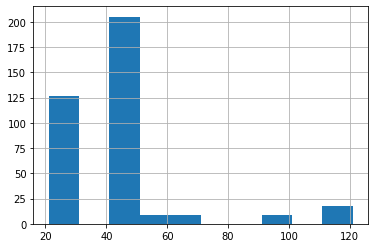

In [ ]:
eda_df[eda_df['level'] == 60]['avg_lifetime'].hist()
eda_df[eda_df['level'] == 60]['avg_lifetime'].unique()
eda_df['avg_lifetime'].median()


### Graph Functions

In [184]:
def hacker_bar_plot(df,columns, x_labels, x_label_outer):
  sns.set(rc={'figure.figsize':(12,6)})
  sns.set_style("white")

  non_smurf = df.loc[df.is_smurf=='Non-Smurf', columns].copy()
  data = non_smurf.melt('is_hack',var_name=x_label_outer, value_name='Relative Performance').replace({x_label_outer:columns[:-1]}, {x_label_outer: x_labels})

  g = sns.barplot(x=x_label_outer, y='Relative Performance', hue='is_hack',data=data, palette=sns.color_palette("Set2"))
  g.set(yticklabels=[])
  
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  fig = g.get_figure()
  fig.savefig('/content/drive/MyDrive/capstone/images/hacker_'+x_label_outer+'.png')

def smurf_bar_plot(df, column, y_label):
  sns.set(rc={'figure.figsize':(8,4)})
  sns.set_style("white")
  no_hacks = df[df.is_hack=='Non-Hacker']
  
  lower_levels = no_hacks[no_hacks.level < 55]
  level_bins = pd.interval_range(0,54,freq=10)
  lower_levels['level_bin'] = pd.cut(lower_levels.level,level_bins)
  
  _lower_levels = lower_levels.sort_values(by='level_bin').dropna()
  _lower_levels['level_bin_labels'] = [str(np.round(bin.left))+' - '+str(np.round(bin.right)) for bin in _lower_levels.level_bin]
    
  g = sns.catplot(palette=sns.color_palette("Set2"), kind='bar',x='level_bin_labels', y=column, hue='is_smurf', data=_lower_levels)
  g.legend.set_title("")
  g.set_axis_labels('COD Rank',y_label)
  fig = g.fig
  fig.savefig('/content/drive/MyDrive/capstone/images/smurf_'+column+'.png')


### Smurf Graphs
* match_time_played
* match_headshot_count
* match_score_per_minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


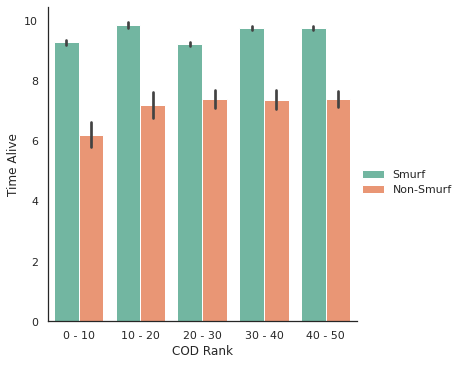

In [160]:
smurf_bar_plot(eda_df, 'match_time_played', 'Time Alive')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


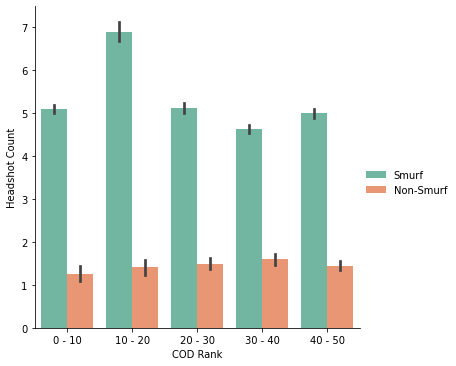

In [73]:
smurf_bar_plot(eda_df, 'match_headshot_count', 'Headshot Count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


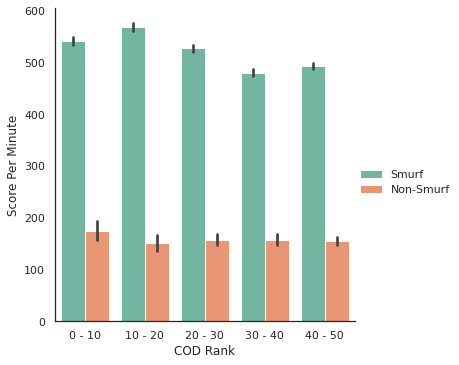

In [161]:
smurf_bar_plot(eda_df, 'match_score_per_minute', 'Score Per Minute')

## Hacker Graphs
### Overall Stats

features:
*   kda_ratio
*   avg_lifetime
*   score_per_game
*   player_perc_headshots
*   player_perc_accuracy
*   player_perc_wins


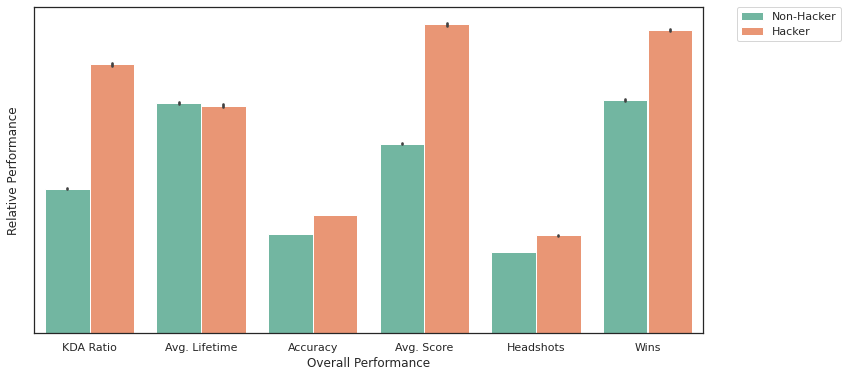

In [188]:
eda_df['score_per_game_scaled'] = eda_df['score_per_game']/60
eda_df['kda_ratio_scaled'] = eda_df['kda_ratio'] * 20
hacker_bar_plot(eda_df
         , ('kda_ratio_scaled'
         ,'avg_lifetime'
         ,'player_perc_accuracy'
         ,'score_per_game_scaled'
         ,'player_perc_headshots'
         ,'player_perc_wins'
         ,'is_hack'
         )
         ,['KDA Ratio'
         ,'Avg. Lifetime'
         ,'Accuracy'
         ,'Avg. Score'
         ,'Headshots'
         ,'Wins'
         ]
        ,'Overall Performance'
)


## Match Statistics
*Note: These statistics are from each player's last 5 games. The COD API has a reCaptcha on their login due to a crackdown on third party stat tracking websites, so I'm unable to pull a lifetime match history ...at the moment.*

features: 
*   score 
*   match_accuracy 
*   match_time_played 
*   match_headshot_count 
*   match_score_per_minute 
*   match_shot_count
*   match_hit_count
*   match_total_xp
*   medalxp
*   match_longest_streak

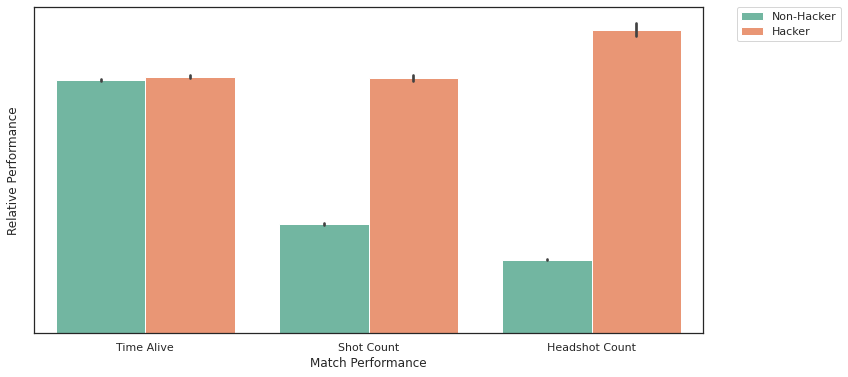

In [187]:
eda_df['match_shot_count_scaled'] = eda_df['match_shot_count']/50
hacker_bar_plot(eda_df
         , ('match_time_played'
         ,'match_shot_count_scaled'
         ,'match_headshot_count'
         ,'is_hack'
         )
         ,['Time Alive'
         ,'Shot Count'
         ,'Headshot Count'
         ]
         , 'Match Performance'
)